# Task for the ML Engineer KTP Associate position (P1)
# A comparative study to solve a classification problem using different ML algorithms
# David Brookes
# February 2022

# Part A

This part requires the production of code to test a number of predictors.   \
The best predictor will be trained on all the training data and then used in Part B.

In [1]:
# Import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Set random seed in order to give the same results on multiple executions.
np.random.seed(0)

In [3]:
# Print current working directory (folder).
curr_dir=os.getcwd()
print(curr_dir)

C:\Users\David Brookes\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P1


In [4]:
# Change working directory.
# Note: 'r' allows backslashes (and forward slashes) in the file path name.
os.chdir(r"D:\My Documents\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P1_Data")
curr_dir=os.getcwd()
print(curr_dir)

D:\My Documents\Notebooks\Post-MSc-Projects\Essex KTP2 Tasks\P1_Data


# Load in the data

In [5]:
# Read in the data P1_data.csv and store as a pandas dataframe.
p1_data_df = pd.read_csv(r"P1_Data.csv")
print(p1_data_df.head())

       F1  F2       F3       F4        F5  F6      F7       F8      F9  \
0  1.6430   0 -4894.24 -13.0281 -4.793400   0  5.1270 -17.1100 -63.340   
1  0.5310   0 -5085.44 -16.2210 -3.991776   0  4.6256  -4.5800 -10.314   
2  0.2640   0 -7021.44 -11.7591 -6.161700   0  4.3628 -14.7118  -6.806   
3  0.3196   1 -4648.76 -11.8110 -4.217700   0  8.9380  -7.5360  -4.670   
4  4.0800   0 -4877.20 -11.2635 -8.061000   1  6.2800 -14.5805 -45.920   

       F10  ...       F13       F14       F15  F16        F17     F18  \
0  3.61690  ...  5.783440 -11315.46  22912.53 -0.4  103811.34  5.4380   
1  3.64880  ...  8.180000 -12852.96  25696.44 -0.4  103884.02  5.0960   
2  3.62830  ...  5.760312 -11012.16  20232.84 -1.4  103987.08  2.3652   
3  3.01503  ...  6.437100 -10297.86  23592.84 -1.4  103842.08  4.4080   
4  3.60030  ...  6.393200 -11527.38  24778.74 -1.4  103842.48  3.1334   

        F19      F20    F21  Class  
0  1747.920 -4879.68 -41.58  False  
1  1496.080 -4186.38 -45.96   True  
2  15

In [6]:
P1_columns = p1_data_df.columns
print(P1_columns)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'Class'],
      dtype='object')


# Basic data checks

In [7]:
# Print the number of rows and columns in the data.
print(p1_data_df.shape)

(1000, 22)


In [8]:
# How much data is missing? Sort in descending order.
p1_data_df.isnull().sum(axis = 0).sort_values(ascending=False).head()

F21      500
Class      0
F2         0
F3         0
F4         0
dtype: int64

Note that feature F21 has 500 missing values from 1000.  \
This is a substantial amount.

In [9]:
# Print the data types of each column in the dataframe.
print(p1_data_df.dtypes)

F1       float64
F2         int64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16      float64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object


Note that there is no categorical data to deal with, except the Class label, 
and therefore there is no need to convert features to dummy variables.

In [10]:
# Look at the value counts of the boolean feature Class,
# in order to ckeck for imbalance.
p1_data_df['Class'].value_counts()

True     506
False    494
Name: Class, dtype: int64

It can be seen that this data is balanced with respect to the Class feature,   \
and therefore does not need the special treatment required for imbalanced datasets.

In [11]:
# Print summary statistics.
p1_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1000.0,1.067873,0.902763,0.112200,0.396475,0.78370,1.464250,4.602000
F2,1000.0,0.507000,0.500201,0.000000,0.000000,1.00000,1.000000,1.000000
F3,1000.0,-5361.832102,1494.941683,-15323.440000,-5523.540000,-4984.54000,-4731.133500,2722.560000
F4,1000.0,-13.230040,2.560369,-23.889000,-14.325000,-12.41625,-11.337000,-10.533870
F5,1000.0,-6.313792,1.842535,-14.613000,-7.453500,-5.91225,-4.853100,-3.991776
F6,1000.0,0.481000,0.499889,0.000000,0.000000,0.00000,1.000000,1.000000
F7,1000.0,5.890532,1.799838,3.942760,4.487150,5.30960,6.856500,12.744000
F8,1000.0,-14.141708,4.861641,-29.850000,-17.209750,-14.18005,-11.066750,5.030000
F9,1000.0,-20.424599,20.571395,-163.680000,-26.025000,-14.28400,-6.504000,-0.124656
F10,1000.0,3.938608,0.901204,3.002990,3.261825,3.65725,4.307000,7.555000


# Histograms

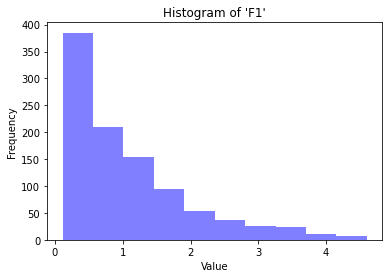

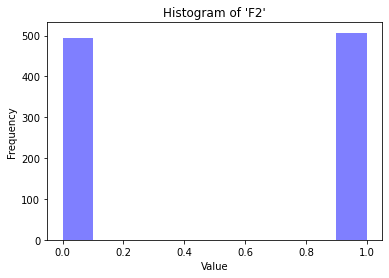

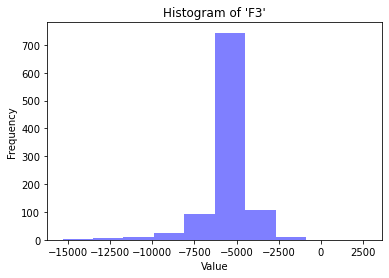

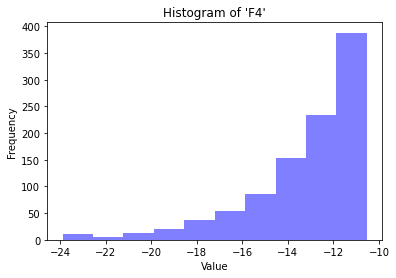

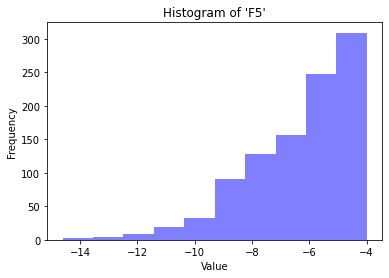

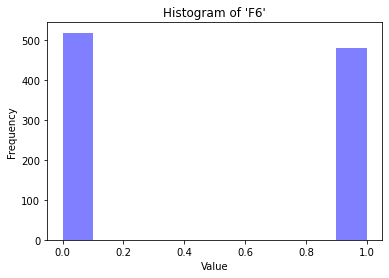

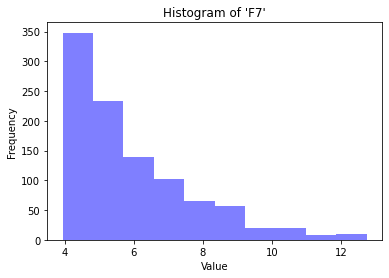

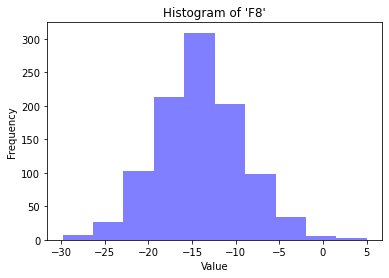

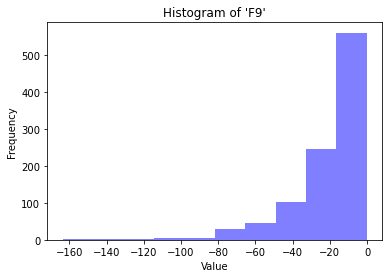

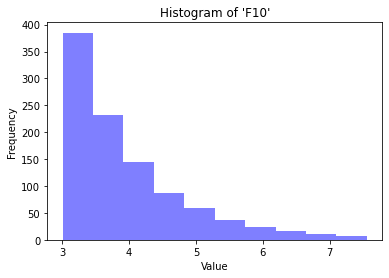

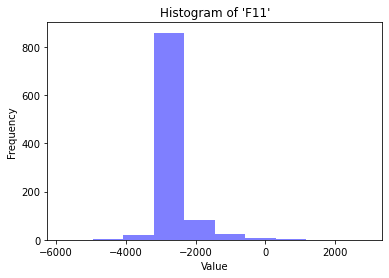

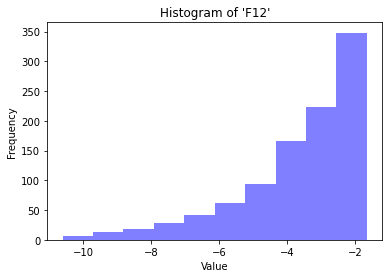

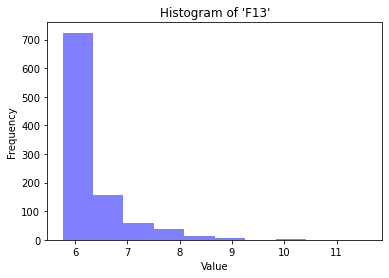

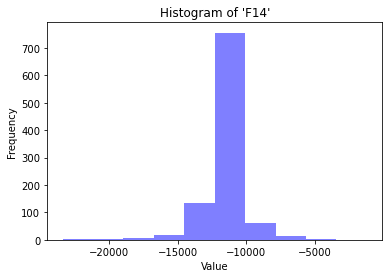

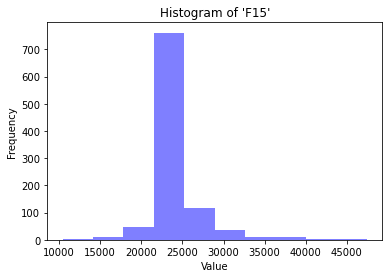

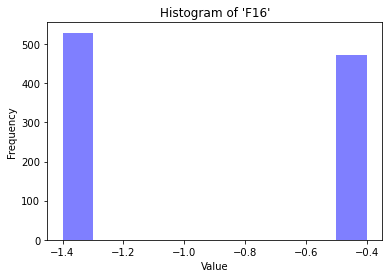

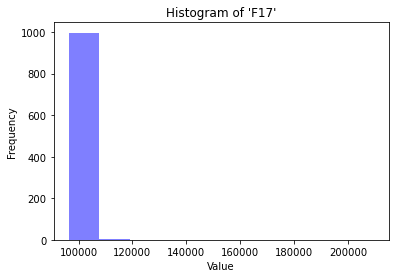

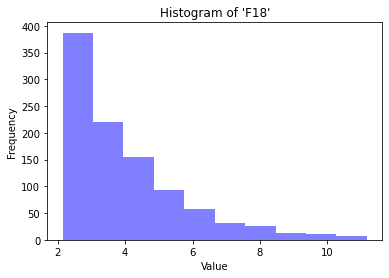

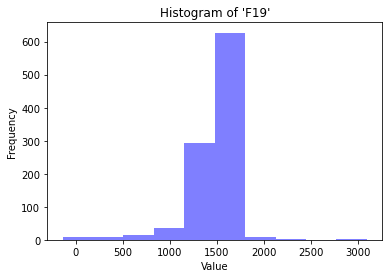

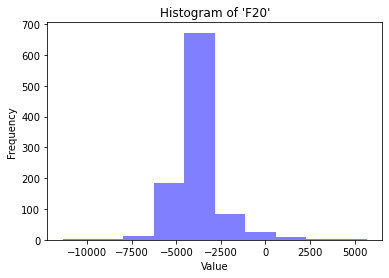

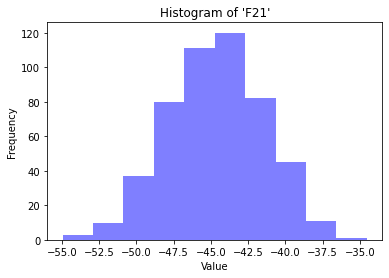

In [12]:
# Use pyplot in matplotlib to plot histograms of the features.
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
variables = p1_data_df.columns
for v in variables[:-1]:
    plot_histogram(p1_data_df[v])

In [13]:
# Determine the value counts for features F2, F6, F16 and F17.
print('F2 value counts')
print(p1_data_df['F2'].value_counts())
print('F6 value counts')
print(p1_data_df['F6'].value_counts())
print('F16 value counts')
print(p1_data_df['F16'].value_counts())
print('F17 value counts')
print(p1_data_df['F17'].value_counts())

F2 value counts
1    507
0    493
Name: F2, dtype: int64
F6 value counts
0    519
1    481
Name: F6, dtype: int64
F16 value counts
-1.4    529
-0.4    471
Name: F16, dtype: int64
F17 value counts
103810.64    2
103850.42    2
103853.07    2
103817.44    2
103866.40    2
            ..
103810.56    1
103883.70    1
103904.40    1
103813.66    1
103833.05    1
Name: F17, Length: 975, dtype: int64


Note that the features F2, F6 and F16 take on values 0 and 1 only.   \
Variables F1, F4, F5, F7, F9, F10, F12, F13 and F17 are skewed.   \
Variable F17 is very much concentrated about its mean value but is skewed with a long tail.

# Standardisation

It can be seen that there is great variation of the range which the features vary.   \
Standardisation or normalisation can sometimes help machine learning algorithms perform better.   \
Standardisation is used here.

In [14]:
# Transform data standardising selected columns.

dont_transform = ['F2','F6','F16','Class']

def standardise(df, not_these_vars):
    variables = list(df.columns)
    df_stand = df.copy()
    for v in variables:
        #print('var = ', v)
        #print()
        if v not in not_these_vars:
            mean = df[v].mean()
            std = df[v].std()
            df_stand[v] -= mean
            df_stand[v] *= 1/std
            #print('mean ', mean)
            #print('std', std)
        else:
            pass
            #print('Do nothing!')
        #print()
    return(df_stand)
    
p1_data_scaled_df = standardise(p1_data_df, dont_transform)

In [15]:
# Print the head of the scaled data.
print(p1_data_scaled_df.head())

         F1  F2        F3        F4        F5  F6        F7        F8  \
0  0.637075   0  0.312783  0.078871  0.825164   0 -0.424223 -0.610553   
1 -0.594700   0  0.184885 -1.168175  1.260230   0 -0.702804  1.966765   
2 -0.890459   0 -1.110149  0.574503  0.082545   0 -0.848817 -0.117263   
3 -0.828870   1  0.476990  0.554233  1.137614   0  1.693190  1.358740   
4  3.336566   0  0.324181  0.768069 -0.948263   1  0.216390 -0.090256   

         F9       F10  ...       F13       F14       F15  F16       F17  \
0 -2.086169 -0.356976  ... -0.685813  0.205137 -0.383477 -0.4 -0.040931   
1  0.491488 -0.321579  ...  2.880827 -0.796656  0.511229 -0.4 -0.019405   
2  0.662016 -0.344326  ... -0.720232  0.402759 -1.244689 -1.4  0.011118   
3  0.765850 -1.024827  ...  0.286986  0.868178 -0.164836 -1.4 -0.031827   
4 -1.239362 -0.375396  ...  0.221652  0.067056  0.216295 -1.4 -0.031708   

        F18       F19       F20       F21  Class  
0  0.833229  1.204137 -0.673137  0.963088  False  
1  0.636

Note that missing values are processed correctly (i.e. ignored).

In [16]:
# Print summary statistics.
p1_data_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1000.0,-1.269040e-15,1.000000,-1.058609,-0.743715,-0.314781,0.439071,3.914791
F2,1000.0,5.070000e-01,0.500201,0.000000,0.000000,1.000000,1.000000,1.000000
F3,1000.0,9.027612e-15,1.000000,-6.663543,-0.108170,0.252379,0.421888,5.407831
F4,1000.0,-3.012923e-15,1.000000,-4.163057,-0.427657,0.317841,0.739362,1.053040
F5,1000.0,1.285305e-15,1.000000,-4.504234,-0.618554,0.217929,0.792763,1.260230
F6,1000.0,4.810000e-01,0.499889,0.000000,0.000000,0.000000,1.000000,1.000000
F7,1000.0,4.279910e-16,1.000000,-1.082193,-0.779727,-0.322769,0.536697,3.807826
F8,1000.0,1.813272e-15,1.000000,-3.231068,-0.631071,-0.007887,0.632494,3.943464
F9,1000.0,7.540080e-16,1.000000,-6.963816,-0.272242,0.298502,0.676697,0.986804
F10,1000.0,5.978551e-16,1.000000,-1.038187,-0.750977,-0.312203,0.408777,4.012846


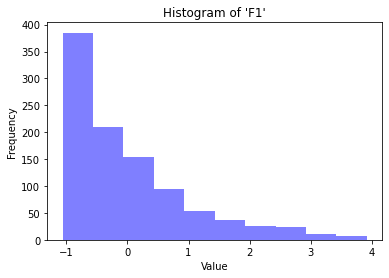

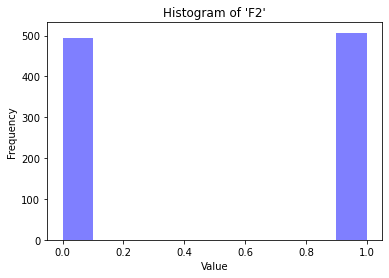

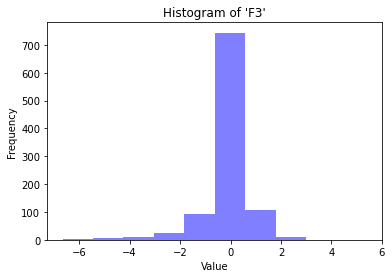

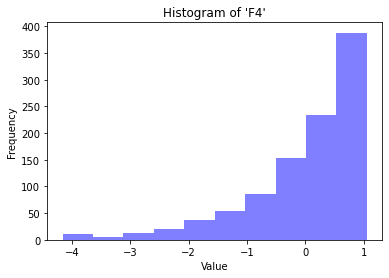

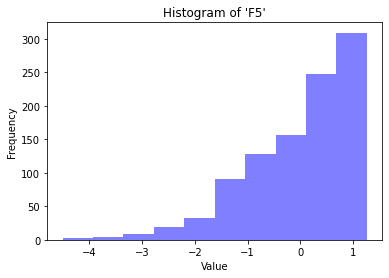

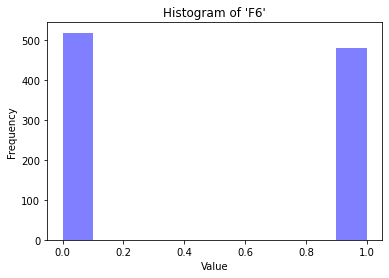

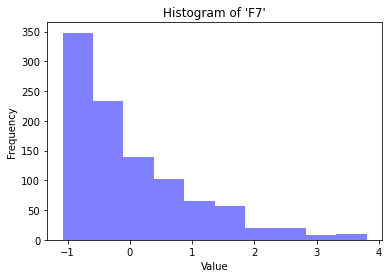

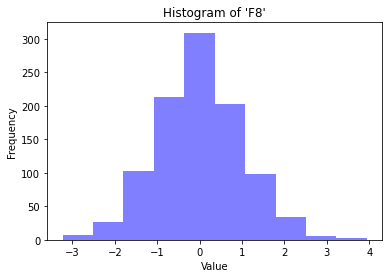

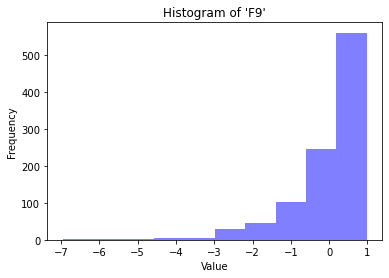

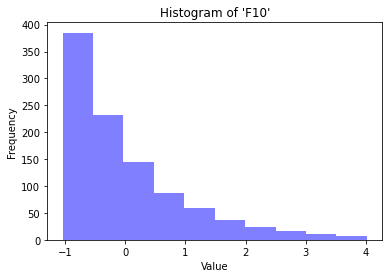

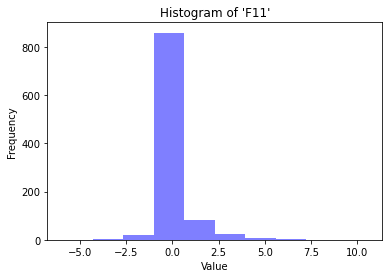

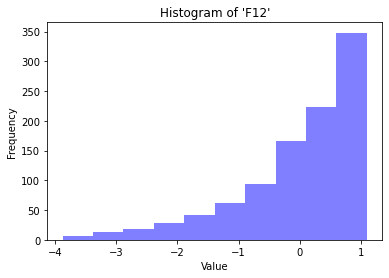

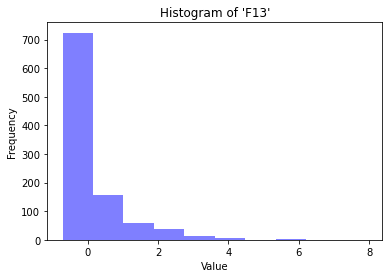

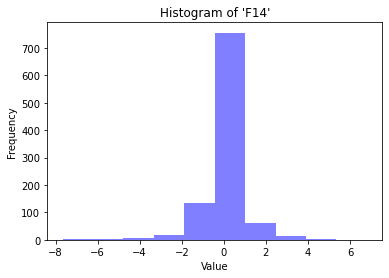

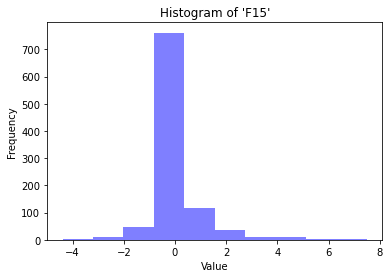

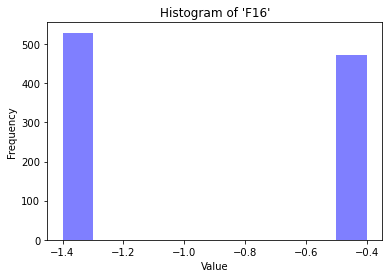

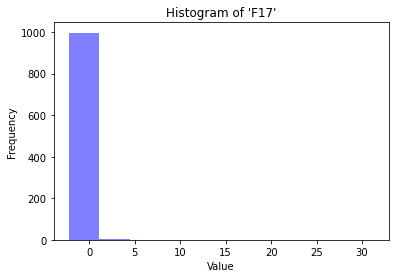

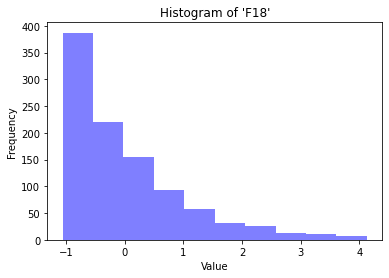

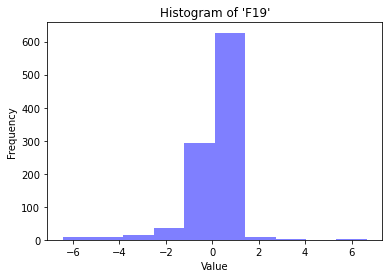

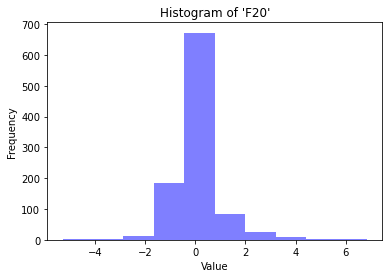

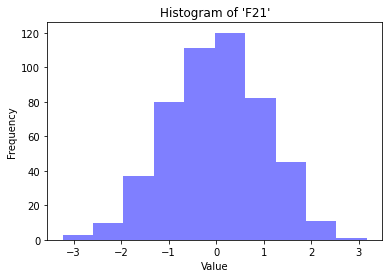

In [17]:
variables = p1_data_scaled_df.columns
for v in variables[:-1]:
    plot_histogram(p1_data_scaled_df[v])

# Impute data using a variety of methods 

In [18]:
# Drop the feature F21 containing the missing values.
p1_data_minus_F21_df = p1_data_scaled_df.drop(columns = ['F21'])
#print(p1_data_minus_F21_df.head())

In [19]:
# Impute the mean value.
F21_mean = p1_data_scaled_df['F21'].mean()
p1_data_impute_mean_df = p1_data_scaled_df.copy()
p1_data_impute_mean_df['F21'].fillna(F21_mean,inplace=True)
#print(p1_data_impute_mean_df.head())

In [20]:
# Impute the median value.
F21_median = p1_data_scaled_df['F21'].median()
p1_data_impute_median_df = p1_data_scaled_df.copy()
p1_data_impute_median_df['F21'].fillna(F21_median,inplace=True)
#print(p1_data_impute_median_df.head())

In [21]:
# Impute using linear regression.
# Use the features F1 to F20, and the known values of F21 as labels to create a multilinear 
# regression model. This model can then be used to predict the unkown values of F21.

from sklearn.linear_model import LinearRegression

# Drop the categorical data Class
p1_data_minus_Class_df = p1_data_scaled_df.drop(columns = ['Class'])

# Determine indices that have values for the F21 variable.
indices_F21_present_mask = p1_data_minus_Class_df['F21'].notnull()
#print('indices_F21_present_mask:', indices_F21_present_mask)

# Determine indices that have missing values for the F21 variable.
indices_F21_missing_mask = p1_data_minus_Class_df['F21'].isnull()
#print(indices_F21_missing_mask)

X_train = p1_data_minus_Class_df[indices_F21_present_mask].drop(columns = ['F21'])

X_test = p1_data_minus_Class_df[indices_F21_missing_mask].drop(columns = ['F21'])

y_train = p1_data_minus_Class_df['F21'][indices_F21_present_mask]
#print(y_train.head())
#print(y_train.shape)

linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Impute the missing values.
p1_data_impute_linreg_df = p1_data_scaled_df.copy()

#print(p1_data_impute_linreg_df['F21'].head())
#print()

# Fill in the missing values with the predictions.
y_index = 0
for i in range(p1_data_impute_linreg_df.shape[0]):
    if indices_F21_missing_mask[i]:
        p1_data_impute_linreg_df.loc[i,'F21'] = y_pred[y_index]
        y_index += 1
        
#print(p1_data_impute_linreg_df['F21'].head())
#print()

#print(p1_data_impute_linreg_df.head())
#print('missing values\n', p1_data_impute_linreg_df.isnull().sum())

# GridsearchCV

GridsearchCV is a routine from sklearn that facilitates hyperparameter tuning   \
by trying various combinations of machine learning parameter values and   \
evaluating the performance using K fold cross validation with the appropriate metric.   \
In this case the metric is the accuracy.

In [22]:
def gridsearchcv(X, y, model, params):

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X, y)
    #print('grid_search.best_params_', grid_search.best_params_)
    #print('grid_search.best_score_', grid_search.best_score_)
    #print('grid_search.best_estimator', grid_search.best_estimator_)
    #print()
    
    # Return the best model (estimator) and best score.
    return(grid_search.best_estimator_, grid_search.best_score_)


In [23]:
# Fit data to various models using a variety of parameter values.
# This is done for each imputation method.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

imputation_names = ['column_drop', 'mean', 'median', 'linreg']
imputation_data = [p1_data_minus_F21_df, p1_data_impute_mean_df,p1_data_impute_median_df, p1_data_impute_linreg_df ]
impute_dict = dict(zip(imputation_names, imputation_data))

classifier_names = ['decision_tree', 'logistic_regression', 'svm', 'random_forest']

tree = DecisionTreeClassifier()
logreg = LogisticRegression()
svm =  SVC()
rfc = RandomForestClassifier()

classifiers = [tree, logreg, svm, rfc]

param_grid_tree = [
 {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
 ]

param_grid_logreg = [
 {'C': [0.5, 1.0, 1.5], 'max_iter': [50, 75, 100, 250, 1000], 'solver' :['liblinear', 'lbfgs']},
 ]

param_grid_svm = [
 {'C': [0.5, 1.0, 1.5], 'degree': [2, 3, 4], 'kernel' :['poly', 'rbf']},
 ]

param_grid_rfc = [
 {'n_estimators': [50, 100, 150], 'max_depth': [2, 3, 4, 5, 6]}
 ]

params = [param_grid_tree, param_grid_logreg, param_grid_svm, param_grid_rfc]

classifiers_params = list(zip(classifiers, params))

classifier_dict = dict(zip(classifier_names, classifiers_params))

classifier_results_df = pd.DataFrame(index = classifier_names, columns=imputation_names)

overall_best_imputation = None
overall_best_model = None
overall_best_score = 0

for imp_name in imputation_names:
    print('Imputation: ', imp_name)
    print()
    X = impute_dict[imp_name].iloc[:,:-1]
    y = impute_dict[imp_name].iloc[:,-1]
    
    for cl_name in classifier_names:
        cl, p = classifier_dict[cl_name]
        best_model, best_score = gridsearchcv(X, y, cl, p)
        print('best model', best_model)
        print('best score %.3f' % best_score)
        
        # Store the score in a data frame.
        classifier_results_df.loc[cl_name, imp_name] = best_score
        if best_score > overall_best_score:
            overall_best_imputation = imp_name
            overall_best_model = best_model
            overall_best_score = best_score       
        print()

print(classifier_results_df)
print()

print('Overall best imputation method: ', overall_best_imputation)
print('Overall best model: ', overall_best_model)
print('Overall best score: ', overall_best_score)
print()
        
# Fit all of the data using this model.

best_imputed_data = impute_dict[overall_best_imputation]
X = best_imputed_data.iloc[:,:-1]
y = best_imputed_data.iloc[:,-1]
overall_best_model.fit(X, y)

Imputation:  column_drop

best model DecisionTreeClassifier(criterion='entropy', max_depth=5)
best score 0.886

best model LogisticRegression(C=1.5, max_iter=50)
best score 0.675

best model SVC(C=1.5, degree=2)
best score 0.682

best model RandomForestClassifier(max_depth=6, n_estimators=150)
best score 0.840

Imputation:  mean

best model DecisionTreeClassifier(criterion='entropy', max_depth=5)
best score 0.871

best model LogisticRegression(C=0.5, max_iter=50, solver='liblinear')
best score 0.724

best model SVC(C=1.5, degree=2)
best score 0.727

best model RandomForestClassifier(max_depth=5, n_estimators=150)
best score 0.841

Imputation:  median

best model DecisionTreeClassifier(criterion='entropy', max_depth=5)
best score 0.870

best model LogisticRegression(C=0.5, max_iter=50, solver='liblinear')
best score 0.727

best model SVC(C=1.5, degree=2)
best score 0.732

best model RandomForestClassifier(max_depth=6, n_estimators=150)
best score 0.842

Imputation:  linreg

best model D

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
# Quick test below to see how the best model performs on the whole of the training data.

# Calculate the accuracy of prediction for the binary variable y.
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    return accuracy
y_pred = overall_best_model.predict(X)

print('Accuracy of best model on the training data: ', accuracy(y, y_pred))


Accuracy of best model on the training data:  0.922


In [25]:
print(classifier_results_df)

                    column_drop   mean median linreg
decision_tree             0.886  0.871   0.87  0.873
logistic_regression       0.675  0.724  0.727  0.721
svm                       0.682  0.727  0.732  0.721
random_forest              0.84  0.841  0.842  0.832


# Bar chart of classifier results 

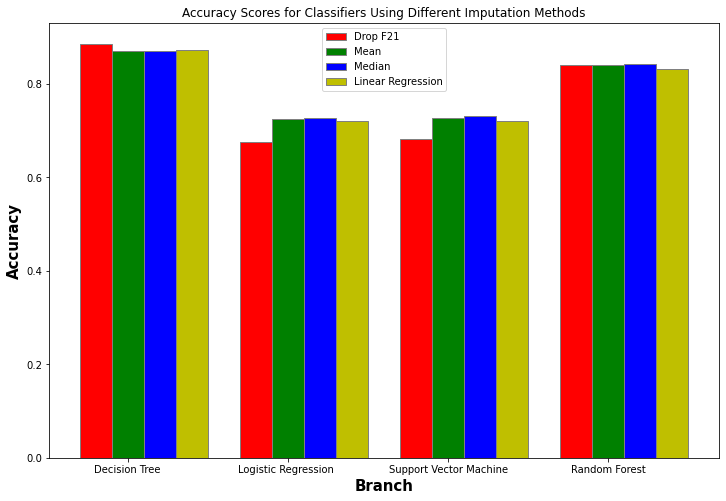

In [26]:
import numpy as np
import matplotlib.pyplot as plt
 
# Set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))

classifier_long_names = ['Decision Tree', 'Logistic Regression ', 'Support Vector Machine', 'Random Forest']
 
# Set height of bar.
imp_drop_col = classifier_results_df['column_drop']
imp_mean = classifier_results_df['mean']
imp_median = classifier_results_df['median']
imp_linreg = classifier_results_df['linreg']
 
# Set position of bar on X axis.
br1 = np.arange(len(classifier_long_names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot.
plt.title('Accuracy Scores for Classifiers Using Different Imputation Methods')

plt.bar(br1, imp_drop_col, color ='r', width = barWidth,
        edgecolor ='grey', label ='Drop F21')
plt.bar(br2, imp_mean, color ='g', width = barWidth,
        edgecolor ='grey', label ='Mean')
plt.bar(br3, imp_median, color ='b', width = barWidth,
        edgecolor ='grey', label ='Median')
plt.bar(br4, imp_linreg, color ='y', width = barWidth,
        edgecolor ='grey', label ='Linear Regression')
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(classifier_long_names))],
        [classifier_long_names[0], classifier_long_names[1], classifier_long_names[2],classifier_long_names[3]])

plt.legend()
plt.show()

### Part B

Predictions are made on a test data set that does not contain Class values.

# Load the test data

In [27]:
# Load the test data.
test_df = pd.read_csv('P1_Test.csv')

# Copy all but the last column 'Class'.
test_data = test_df.iloc[:,:-1].copy()

print(test_data.head())

       F1  F2       F3       F4       F5  F6      F7      F8      F9      F10  \
0  1.5620   1 -4522.64 -10.7841  -6.7038   1  5.4270  -9.679 -18.566  5.86600   
1  1.8400   1 -3893.64 -12.6885  -7.9830   0  4.5008 -11.561 -25.920  3.18100   
2  0.3782   1 -4916.46 -11.9391  -5.1132   1  5.3808 -13.281 -20.240  3.04817   
3  1.1410   0 -8705.44 -10.9737  -6.9564   1  6.5020 -12.101 -13.626  3.28770   
4  1.4360   1 -6963.44 -15.9780 -10.2420   1  4.2970 -11.596 -14.624  3.55760   

   ...      F12       F13       F14       F15  F16        F17     F18  \
0  ... -1.84740  5.761109 -11347.23  22929.33 -0.4  103741.46  4.0760   
1  ... -2.91880  6.797000 -11289.36  25723.74 -1.4  103858.01  2.6546   
2  ... -3.90400  6.922000 -11133.06  23138.58 -0.4  105361.06  5.6300   
3  ... -6.14800  9.260000 -11773.53  23100.78 -0.4  103835.75  2.3680   
4  ... -1.64318  5.997600 -11937.06  27299.64 -1.4  103877.64  2.6908   

         F19      F20    F21  
0  1466.0700 -4266.40    NaN  
1  1607.6600

# Histograms

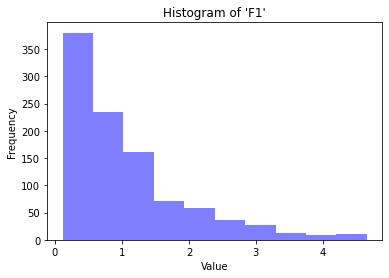

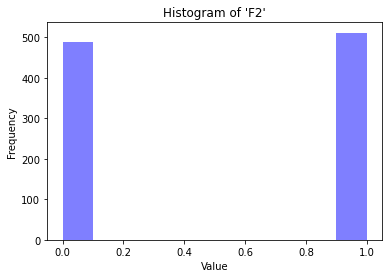

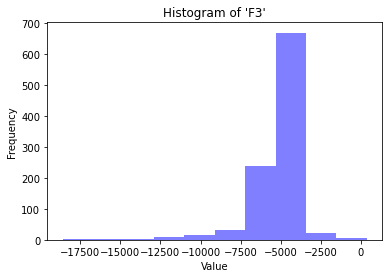

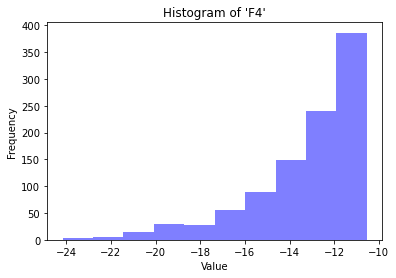

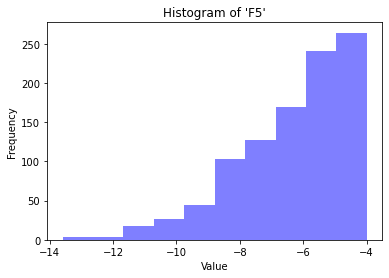

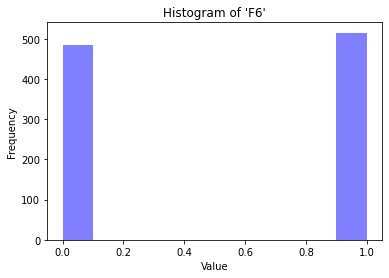

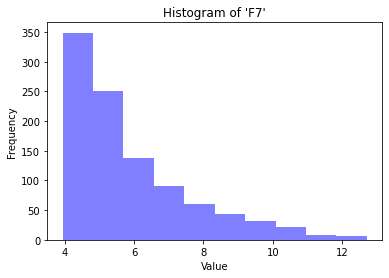

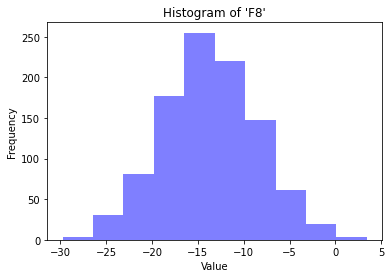

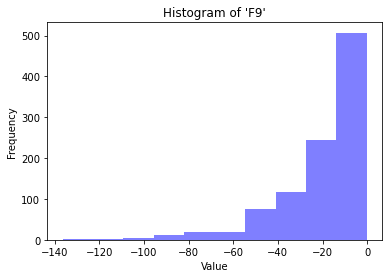

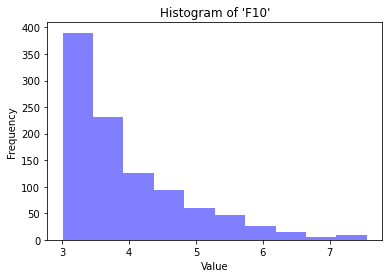

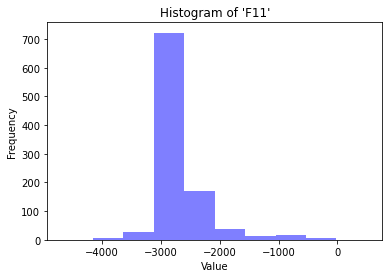

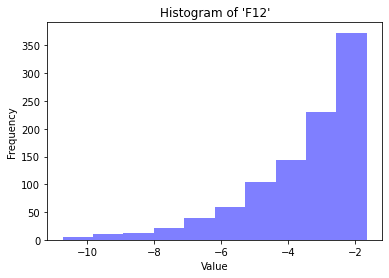

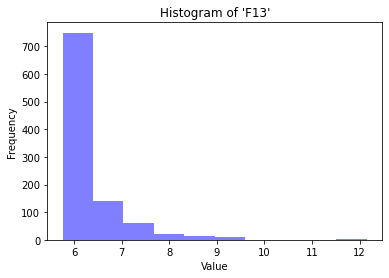

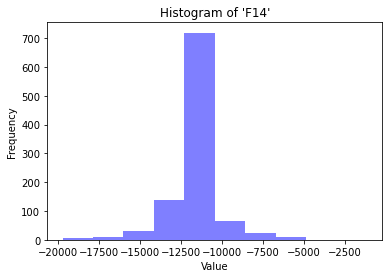

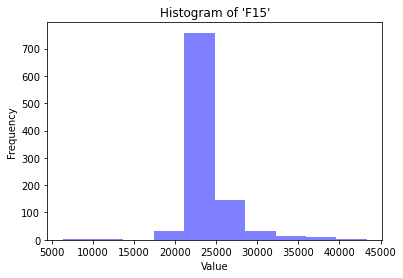

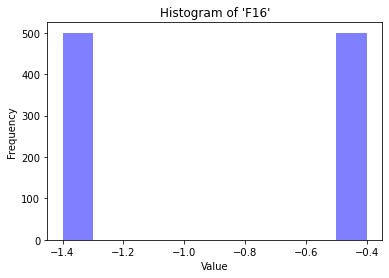

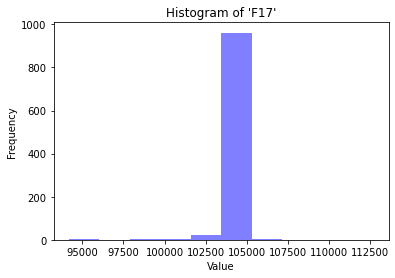

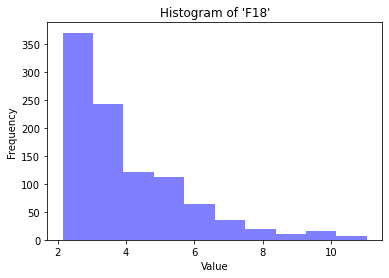

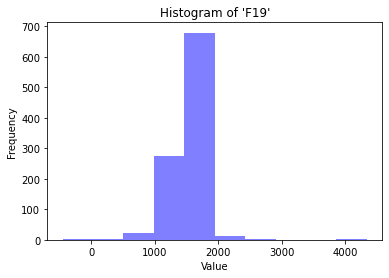

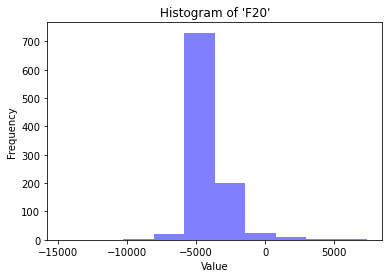

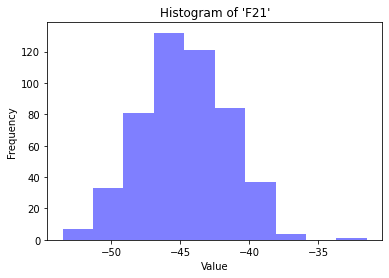

In [28]:
# Plot histograms of the data.
variables = test_data.columns
for v in variables:
    plot_histogram(test_data[v])

# Standardisation

Since the best performimg classifier was the simple decision tree using   \
standardised training data that had column F21 removed (surprisingly),   \
then the same data processing steps should be performed on the test data.

In [29]:

test_data_minus_F21  = test_data.drop(columns = ['F21'])

dont_transform = ['F2','F6','F16','Class']
   
test_data_scaled = standardise(test_data_minus_F21, dont_transform)

test_data_scaled_df = pd.DataFrame(test_data_scaled) # Convert to pandas dataframe.

print(test_data_scaled_df.head())

         F1  F2        F3        F4        F5  F6        F7        F8  \
0  0.568649   1  0.529000  0.981826 -0.222613   1 -0.248250  0.771425   
1  0.876539   1  0.935925  0.228034 -0.942524   0 -0.770058  0.410491   
2 -0.742432   1  0.274221  0.524659  0.672549   1 -0.274279  0.080626   
3  0.102383   0 -2.177025  0.906779 -0.364771   1  0.357390  0.306929   
4  0.429101   1 -1.050054 -1.074002 -2.213850   1 -0.884876  0.403779   

         F9       F10       F11       F12       F13       F14       F15  F16  \
0  0.071173  2.151522 -1.563591  0.968566 -0.676640  0.192051 -0.384185 -0.4   
1 -0.300381 -0.857686 -0.375208  0.351210  0.749711  0.230475  0.547381 -1.4   
2 -0.013404 -1.006555  0.242308 -0.216476  0.921827  0.334254 -0.314428 -0.4   
3  0.320762 -0.738102  1.708662 -1.509501  4.141092 -0.090999 -0.327029 -0.4   
4  0.270339 -0.435612 -0.154193  1.086240 -0.351008 -0.199578  1.072735 -1.4   

        F17       F18       F19       F20  
0 -0.115142  0.042970 -0.036060 -0.1

# Produce predictions and write to CSV file

In [31]:
# Use the best model found earlier to make predictions.
X_test = test_data_scaled_df

predicted = overall_best_model.predict(X_test)
predicted_df = pd.DataFrame(predicted)
print(predicted_df.head())
 
# Replace the last (empty) column with the prediction.
test_df.iloc[:,-1] = predicted

print(test_df.head())

# Save to the destination file.
test_df.to_csv('P1_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed.
assert pd.read_csv('P1_Test.csv').iloc[:,:-1].equals(pd.read_csv('P1_Test_Predictions.csv').iloc[:,:-1])

       0
0  False
1  False
2   True
3  False
4   True
       F1  F2       F3       F4       F5  F6      F7      F8      F9      F10  \
0  1.5620   1 -4522.64 -10.7841  -6.7038   1  5.4270  -9.679 -18.566  5.86600   
1  1.8400   1 -3893.64 -12.6885  -7.9830   0  4.5008 -11.561 -25.920  3.18100   
2  0.3782   1 -4916.46 -11.9391  -5.1132   1  5.3808 -13.281 -20.240  3.04817   
3  1.1410   0 -8705.44 -10.9737  -6.9564   1  6.5020 -12.101 -13.626  3.28770   
4  1.4360   1 -6963.44 -15.9780 -10.2420   1  4.2970 -11.596 -14.624  3.55760   

   ...       F13       F14       F15  F16        F17     F18        F19  \
0  ...  5.761109 -11347.23  22929.33 -0.4  103741.46  4.0760  1466.0700   
1  ...  6.797000 -11289.36  25723.74 -1.4  103858.01  2.6546  1607.6600   
2  ...  6.922000 -11133.06  23138.58 -0.4  105361.06  5.6300  1543.2200   
3  ...  9.260000 -11773.53  23100.78 -0.4  103835.75  2.3680  1532.0397   
4  ...  5.997600 -11937.06  27299.64 -1.4  103877.64  2.6908  1084.3200   

       F